<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitabase_Regession_13_04_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from glob import glob
import os
import pandas as pd
path = "/content/drive/MyDrive/Iqram Sir/Fitabase data pulls - seperate"


#Functions

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from tqdm.notebook import tqdm

def get_contenct(patient_folder_adrs):

  post_adrs = sorted(glob(patient_folder_adrs+"/*"))[0]
  

  pre_adrs = sorted(glob(patient_folder_adrs+"/*"))[1]

  for i in glob(post_adrs+"/*"):
    if "1min" in i.split("_"):
      post_1min = i
    if "minuteCaloriesNarrow" in i.split("_"):
      post_cal = i

  for i in glob(pre_adrs+"/*"):
    if "1min" in i.split("_"):
      pre_1min = i
    if "minuteCaloriesNarrow" in i.split("_"):
      pre_cal = i
 
  return post_1min, post_cal, pre_1min, pre_cal



def plot_single_sample(X,Y,m,c):
  fig = plt.figure(figsize=(13,8))
  ax = fig.add_subplot()
  fig.subplots_adjust(top=0.85)

  # Set titles for the figure and the subplot respectively
  #fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
  ax.set_title('Max HR',fontweight='bold')

  ax.scatter(X, Y)

  high_y = Y.max()

  high_x = (high_y-c)/m

  rang_y=[Y.min(),high_y]

  ax.plot((rang_y-c)/m, rang_y, color = "red")

  ax.scatter(high_x, high_y, color='green')
  ax.annotate('(aEEMax,HRMax)', xy=(high_x, high_y), xytext=(high_x-5, high_y+10),fontweight='bold')
  ax.annotate("("+str(round(high_x[0],2))+","+str(high_y)+")", xy=(high_x, high_y), xytext=(high_x-3, high_y+5),fontweight='bold',color = 'purple')

  ax.set_xlabel("aEE(kJ/min)",fontweight='bold',fontsize=12)
  ax.set_ylabel("HR(BPM)",fontweight='bold',fontsize=12)

  ax.axis([0, high_x+10, 0, high_y+30])

  ax.grid()
  plt.show()


def plot_max(X,Y,m,c):
  fig = plt.figure(figsize=(13,8))
  ax = fig.add_subplot()
  fig.subplots_adjust(top=0.85)

  # Set titles for the figure and the subplot respectively
  #fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
  ax.set_title('Max HR & aEE',fontweight='bold')

  ax.scatter(X, Y)

  high_y = Y.max()

  high_x = (high_y-c)/m

  rang_y=[Y.min(),high_y]

  ax.plot((rang_y-c)/m, rang_y, color = "red")

  ax.scatter(high_x, high_y, color='green')
  ax.annotate('(aEE_Max,HR_Max)', xy=(high_x, high_y), xytext=(high_x-5, high_y+10),fontweight='bold')
  ax.annotate("("+str(round(high_x[0],2))+","+str(high_y)+")", xy=(high_x, high_y), xytext=(high_x-3, high_y+5),fontweight='bold',color = 'purple')

  ax.set_xlabel("aEE_MAX(kJ/min)",fontweight='bold',fontsize=12)
  ax.set_ylabel("HR_MAX(BPM)",fontweight='bold',fontsize=12)

  ax.axis([0, high_x+10, 0, high_y+30])

  ax.grid()
  plt.show()




def single_sample_reg(df_1min, df_cal,cal_fil_lim):
  list_1 = list(df_1min["Time"])
  list_2 = list(df_cal["ActivityMinute"])

  hr = []
  aee = []
  time = []

  if len(list_1)>len(list_2):
    for i in tqdm(list_1):
      if i in list_2 and list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0] >= cal_fil_lim:
        hr.append(list(df_1min.query("Time == '"+i+"'")['Value'])[0])
        aee.append(list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
        time.append(i)

  else:
    for i in tqdm(list_2):
      if i in list_1 and list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0] >= cal_fil_lim:
        hr.append(list(df_1min.query("Time == '"+i+"'")['Value'])[0])
        aee.append(list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
        time.append(i)

  d={
    "Time" : time,
     "HR(BPM)" : hr,
     "aEE(kJ/min)":aee
  }

  dataFrame = pd.DataFrame.from_dict(d)


  Y = dataFrame["HR(BPM)"].values.reshape(-1, 1)
  X = dataFrame["aEE(kJ/min)"].values.reshape(-1, 1)
  reg = LinearRegression().fit(X, Y)
  m = reg.coef_[0]
  c = reg.intercept_
  plot_single_sample(X,Y,m,c)
  
  return dataFrame



def hr_aee_mx_reg(df_1min, df_cal, cal_fil_lim):
  list_1 = list(df_1min["Time"])
  list_2 = list(df_cal["ActivityMinute"])

  hr = []
  aee = []
  time = []

  if len(list_1)>len(list_2):
    for i in tqdm(list_1):
      if i in list_2 and list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0] >= cal_fil_lim:
        hr.append(list(df_1min.query("Time == '"+i+"'")['Value'])[0])
        aee.append(list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
        time.append(i)

  else:
    for i in tqdm(list_2):
      if i in list_1 and list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0] >= cal_fil_lim:
        hr.append(list(df_1min.query("Time == '"+i+"'")['Value'])[0])
        aee.append(list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
        time.append(i)

  d={
    "Time" : time,
     "HR(BPM)" : hr,
     "aEE(kJ/min)":aee
  }

  dataFrame = pd.DataFrame.from_dict(d)


  Y = dataFrame["HR(BPM)"].values.reshape(-1, 1)
  X = dataFrame["aEE(kJ/min)"].values.reshape(-1, 1)
  reg = LinearRegression().fit(X, Y)
  m = reg.coef_[0]
  c = reg.intercept_
  
  hr_mx = Y.max()
  aee_mx = (hr_mx-c)/m
  return hr_mx, round(aee_mx[0],2)



#Sample Test for single subject

Set the name of the subject

In [45]:
subject = '024-DP'

In [46]:


for i in glob(path+"/*"):
  #get_contenct(i)
  if subject in i.split("/"):
    Post_1min, Post_cal, Pre_1min, Pre_cal = get_contenct(i)

df_post_1min = pd.read_csv(Post_1min)
df_post_cal = pd.read_csv(Post_cal)
df_pre_1min = pd.read_csv(Pre_1min)
df_pre_cal = pd.read_csv(Pre_cal)

In [47]:
df_post_1min.head()

,Time,Value
0,8/9/2022 9:59:00 AM,68
1,8/9/2022 10:00:00 AM,72
2,8/9/2022 10:02:00 AM,70
3,8/9/2022 10:03:00 AM,73
4,8/9/2022 10:04:00 AM,70


In [48]:
df_post_cal.head()

,ActivityMinute,Calories
0,8/9/2022 12:00:00 AM,1.275
1,8/9/2022 12:01:00 AM,1.275
2,8/9/2022 12:02:00 AM,1.275
3,8/9/2022 12:03:00 AM,1.275
4,8/9/2022 12:04:00 AM,1.275


##Set the Calorie filter limit

In [65]:
calorie_filter_limit = 1.4

##Post Regression Line
<font color = 'blue'>Details:</font> This section will plot the regression line of `post condition`.<br>


  0%|          | 0/49655 [00:00<?, ?it/s]

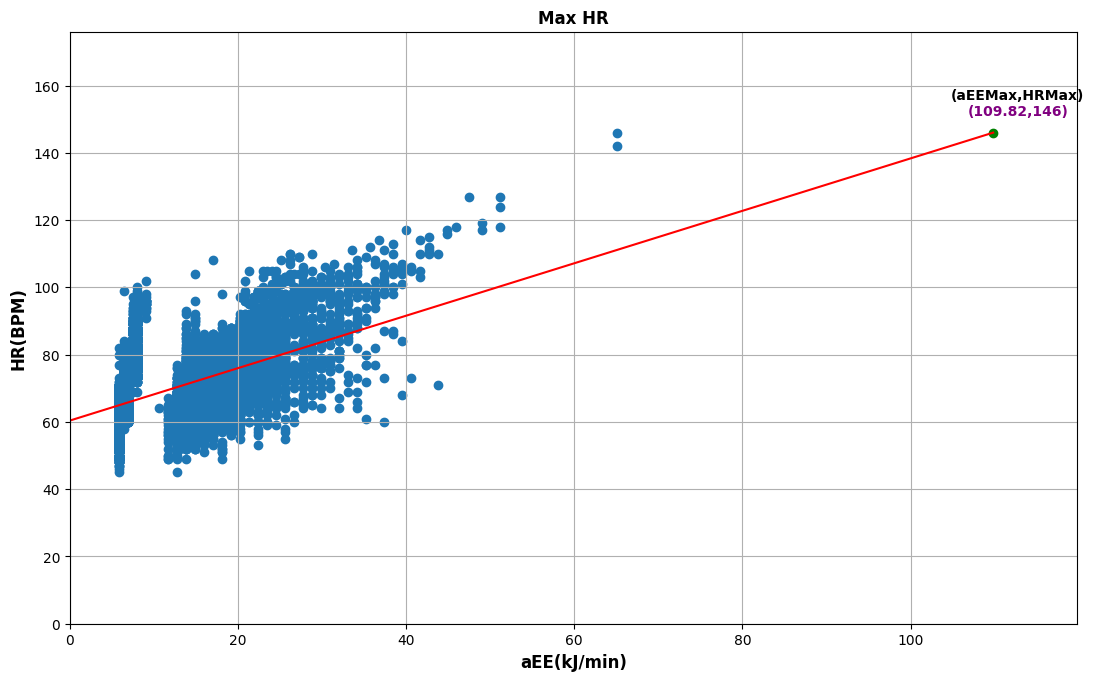


Minimum data of calorie is 1.4 , Which is more or equal then  1.4


In [66]:
 dataTest = single_sample_reg(df_post_1min,df_post_cal, calorie_filter_limit)

 #test
 print()
 print("Minimum data of calorie is",round((dataTest["aEE(kJ/min)"].min())/4.184,2),", Which is more or equal then ",calorie_filter_limit)

##Pre Regression Line
<font color = 'blue'>Details:</font> This section will plot the regression line of `pre condition`.<br>

  0%|          | 0/18720 [00:00<?, ?it/s]

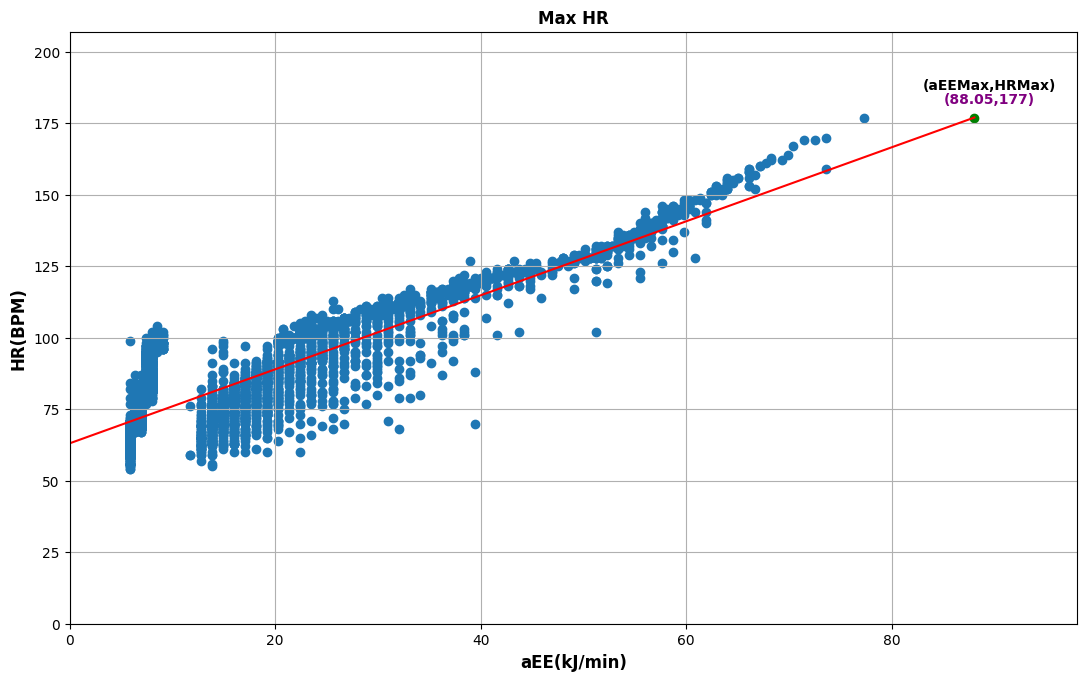


Minimum data of calorie is 1.4 , Which is more or equal then  1.4


In [62]:
dataTest = single_sample_reg(df_pre_1min, df_pre_cal, calorie_filter_limit)

#test
print()
print("Minimum data of calorie is",round((dataTest["aEE(kJ/min)"].min())/4.184,2),", Which is more or equal then ",calorie_filter_limit)



---



---



#Dataset Creation with all `HR_MAX` and `aEE_MAX` values of all patients.

<font color = 'blue'>Details:</font> In this section, a csv file (`Fitabase_HR_aEE_MAX.csv`) will be created with `Patient Id`, `Condition`, `HR_MAX`, `aEE_MAX`.

In [ ]:
from tqdm.notebook import tqdm
p_id = []
condition = []
hr_max = []
aee_max = []


for i in tqdm(sorted(glob(path+"/*"))):

  print()
  print()
  sub =  os.path.basename(i)
  print("Subject processing: ",sub)
  Post_1min, Post_cal, Pre_1min, Pre_cal = get_contenct(i)

  p_id.append(sub)
  condition.append('pre')
  df_pre_1min = pd.read_csv(Pre_1min)
  df_pre_cal = pd.read_csv(Pre_cal)
  print("Pre Condition In Process:")
  h,a = hr_aee_mx_reg(df_pre_1min,df_pre_cal,calorie_filter_limit)
  hr_max.append(h)
  aee_max.append(a)
  print("Pre Condition Process Complete...")

  p_id.append(sub)
  condition.append('post')
  df_post_1min = pd.read_csv(Post_1min)
  df_post_cal = pd.read_csv(Post_cal)
  print("Post Condition In Process:")
  h,a = hr_aee_mx_reg(df_post_1min,df_post_cal,calorie_filter_limit)
  hr_max.append(h)
  aee_max.append(a)
  print("Post Condition Process Complete...")
  print()

  print("Processing Complete.....")
  print("------------------------------------------------------------------------")


print("Dataset creation complete......")

  0%|          | 0/36 [00:00<?, ?it/s]



Subject processing:  001-JV
Pre Condition In Process:


  0%|          | 0/80640 [00:00<?, ?it/s]

Pre Condition Process Complete...
Post Condition In Process:


  0%|          | 0/50400 [00:00<?, ?it/s]

Post Condition Process Complete...

Processing Complete.....
------------------------------------------------------------------------


Subject processing:  002-JR
Pre Condition In Process:


  0%|          | 0/21600 [00:00<?, ?it/s]

##Dataset saving destination

In [ ]:
file_save_destination = '/content/drive/MyDrive/Iqram Sir/Fitabase_HR_aEE_MAX.csv'

##Saving the dataset

In [ ]:
main_dict = {
    "Patient_Id" : p_id,
    "Condition" : condition,
    "HR_MAX(BPM)" : hr_max,
    "aEE_MAX(kJ/min)": aee_max
}

df = pd.DataFrame.from_dict(main_dict)
df.to_csv(file_save_destination,index=False)
df

#ALL Subject/Patient Regression Plot

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Iqram Sir/Fitabase_HR_aEE_MAX.csv')
df.head(10)

,Patient_Id,Condition,HR_MAX(BPM),aEE_MAX(kJ/min)
0,001-JV,post,149,68.83
1,001-JV,pre,149,71.36
2,002-JR,post,145,62.76
3,002-JR,pre,137,65.93
4,003-ES,post,130,35.23
...,...,...,...,...
57,032-SS,pre,141,21.09
58,033-PJ,post,115,22.11
59,033-PJ,pre,128,29.73
60,034-DS,post,139,29.81


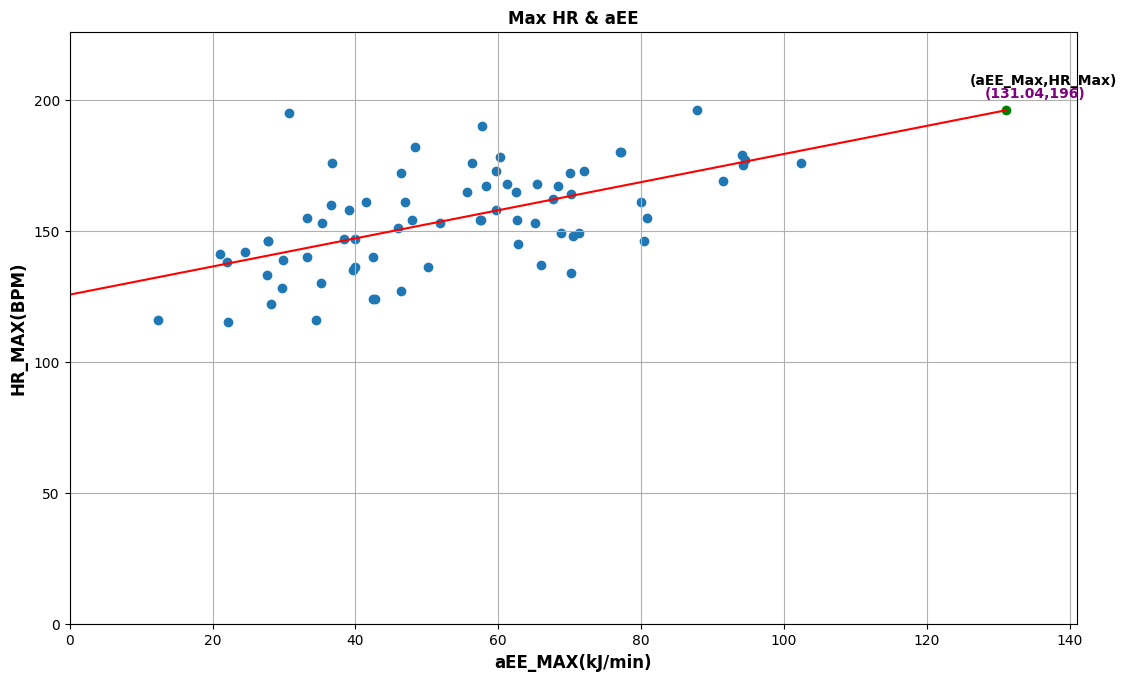

In [28]:
Y = df["HR_MAX(BPM)"].values.reshape(-1, 1)
X = df["aEE_MAX(kJ/min)"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
m = reg.coef_[0]
c = reg.intercept_
plot_max(X,Y,m,c)